# Setup

In [1]:
import sys
sys.path.append("/content/drive/MyDrive/Afstudeerproject/Complete/")
from Featurizer import Featurizer
!pip install python-Levenshtein
import CitationMatcher
!pip install python-crfsuite
import pycrfsuite
import matplotlib.pyplot as plt
import random
import json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
def parse_citation(citation):
    featurizer = Featurizer(all=True)
    featurized = featurizer.featurize_citation(citation)
    final_citation = {"citation": citation}
    labelled = {"title": [], "author": [], "editor": [], "edition": [], "year": [], "entry": [], "other": []}

    parser = pycrfsuite.Tagger()
    parser.open("/content/drive/MyDrive/Afstudeerproject/Complete/Final_Model.model")

    tokens = []
    for token in featurized:
        tokens.append(token["token"])

    y_pred = parser.tag(featurized)
    for token, tag in zip(tokens, y_pred):
        if tag in labelled:
            labelled[tag].append(token)
    for label in labelled:
        if label == "author" or label == "editor":
            labelled[label] = "/".join(labelled[label])
        elif label == "edition" and len(labelled[label]) > 0:
            if "Auf" in labelled[label]:
                if len(labelled[label]) == 1:
                    labelled[label] = labelled[label][0].split(".")
                    labelled[label][0] = labelled[label][0] + "."
                if labelled[label][0][0].isdigit():
                    labelled[label] = labelled[label][0] + " Auflage"
                else:
                    labelled[label] = ""
            if type(labelled[label]) == list:
                labelled[label] = " ".join(labelled[label])
        elif label == "entry":
            for poss in ["M.W.N", "m.w.N", "m.", "M.", "w.", "W.", "n.", "N.", "m.w.N.", "M.W.N."]:
                if poss in labelled[label]:
                    labelled[label].remove(poss)
            labelled[label] = " ".join(labelled[label])
        else:
            labelled[label] = " ".join(labelled[label])
    
    final_citation["labels"] = labelled

    return final_citation

In [3]:
def find_matches(citation, results=10):
    parsed_citation = parse_citation(citation)
    matches = CitationMatcher.match_citation(parsed_citation, results)
    
    return matches

# Usage

In [4]:
with open("/content/drive/MyDrive/Afstudeerproject/Data/all_used_citations.txt", "r") as f:
    citations = [citation.replace("\n", "") for citation in f.readlines()]

In [ ]:
citation = "Heinrich in Musielak, Zivilprozessordnung, 7. Aufl., § 32 Rn. 1"

In [ ]:
citation = "Lange, BeckOK BGB, Bamberger/Roth/Hau/Poseck, Stand 01.01.2018, § 2197, Rn. 5 ff"

In [5]:
citation = "Palandt/Ellenberger, BGB, 7. Aufl., § 32 Rn. 1"

In [5]:
citation = random.choice(citations)

In [ ]:
5, 5, 1,1,1,1

In [4]:
citation = "ZPO/Musielak, 7. Aufl., § 32 Rn. 1"

In [6]:
print(citation)
matches = find_matches(citation, results=len(citations))
scores = [score for _, score in matches]

Palandt/Ellenberger, BGB, 7. Aufl., § 32 Rn. 1


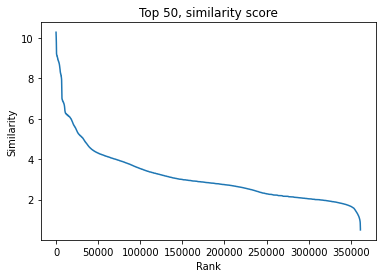

In [7]:
y = scores
x = [i for i in range(len(y))]
plt.plot(x,y)
plt.title("Top 50, similarity score")
plt.ylabel("Similarity")
plt.xlabel("Rank")
plt.show()

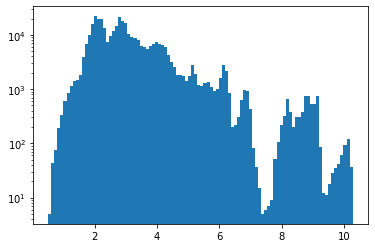

In [8]:
plt.hist(scores, 100)
plt.yscale('log')
plt.show()

In [9]:
matches.reverse()

In [15]:
for i, match in enumerate(matches):
    if match[1] > 8.5:
        break

In [16]:
print(citation)
before = 10
after = 10
print(matches[i-before][0]["labels"], matches[i-before][1])
print(matches[i+after][0]["labels"], matches[i+after][1])

Palandt/Ellenberger, BGB, 7. Aufl., § 32 Rn. 1
{'title': 'BGB', 'author': 'Diederichsen', 'editor': 'Palandt', 'edition': ['68.', 'Aufl'], 'year': '2009', 'entry': '§ 1687 RdNr 13', 'other': 'vgl in , , ,'} 8.5
{'title': 'BGB', 'author': 'Palandt/Heldrich', 'editor': '', 'edition': ['60.', 'Aufl.'], 'year': '2000', 'entry': 'Anh. zu Art 24 EGBGB Rdnr. 63', 'other': ', , , ,'} 8.50603318250377


Abbrevitation improvement \\
Compound noun splitting \\
Verbatim

In [20]:
CitationMatcher.compare_names("Musielak", "", "Musielak/Voit", "")

0.5

In [25]:
print("Original:", citation)
print("-" * len(citation))
for i, match in enumerate(matches, 1):
    if i < 25:
        print(f"Match {i}, score: {match[1]}")
        print("Citation: ", match[0]["citation"])
        print("-" * len(citation))
    if i == 4:
        print(match[0])

Original: Palandt/Ellenberger, BGB, 7. Aufl., § 32 Rn. 1
----------------------------------------------
Match 1, score: 10.282352941176471
Citation:  Palandt/Ellenberger, BGB, 73. Aufl., § 29 Rn. 1
----------------------------------------------
Match 2, score: 10.239495798319329
Citation:  Palandt/Ellenberger, BGB, 74. Aufl., § 183 Rn. 1
----------------------------------------------
Match 3, score: 10.239495798319329
Citation:  Palandt/Ellenberger, BGB, 71. Aufl., 2012, § 134, Rn. 1
----------------------------------------------
Match 4, score: 10.239495798319329
Citation:  Palandt/Ellenberger, BGB 73. Aufl. § 211 Rn. 1
----------------------------------------------
{'citation': 'Palandt/Ellenberger, BGB 73. Aufl. § 211 Rn. 1', 'labels': {'title': 'BGB', 'author': 'Palandt/Ellenberger', 'editor': '', 'edition': ['73.', 'Aufl.'], 'year': '', 'entry': '§ 211 Rn. 1', 'other': ','}}
Match 5, score: 10.239495798319329
Citation:  Palandt/Ellenberger, BGB, 73. Aufl., § 209 Rn. 1
------------

- Identify book/editor then identify authors
- Histogram


# Evaluation

In [ ]:
with open("/content/drive/MyDrive/Afstudeerproject/Data/labelled_data.json", "r") as f:
    x = json.load(f)

In [ ]:
from IPython.core.display import clear_output
checks = []
score = 0
checked = 0
for citation in x:
    if checked == 50:
        print(f"Score = {score} out of {checked} = {score/checked}")
        break
    if citation["labels"]["title"] != "" or citation["labels"]["author"] == "":
       continue
    labels = citation["labels"]
    citation = citation["citation"]
    if checked > 0:
        print(f"Currently {score} / {checked}: {score/checked}")
    print("Original:", citation)
    print("Labels", labels)
    print("-" * len(citation))
    matches = find_matches(citation, results=10)
    for i, match in enumerate(matches, 1):
        print(f"Match {i}, score: {match[1]}")
        print("Citation: ", match[0]["citation"])
        print("Labels", match[0]["labels"])
        print("-" * len(citation))
    result = input()
    clear_output(wait=True)
    if result == "y":
        score += 1
    elif result == "n":
        pass
    else:
        continue
    
    checked += 1
    checks.append(citation)

Currently 0 / 1: 0.0
Original: vgl. Korintenberg/Bengel § 156 Rn. 10
Labels {'title': '', 'author': 'Korintenberg/Bengel', 'editor': '', 'edition': '', 'year': '', 'entry': '§ 156 Rn. 10', 'other': 'vgl.'}
-------------------------------------
Match 1, score: 1.8
Citation:  vgl. Korintenberg/Bengel GNotKG § 97 Rn. 16 f. m.w.N., beck-online
Labels {'title': 'GNotKG', 'author': 'Korintenberg/Bengel', 'editor': '', 'edition': '', 'year': '', 'entry': '§ 97 Rn. 16 f.', 'other': 'vgl. m.w.N. , beck-online'}
-------------------------------------
Match 2, score: 1.8
Citation:  Korintenberg/Bengel, KostO, 14. Aufl., § 39 Rdnr. 54
Labels {'title': 'KostO', 'author': 'Korintenberg/Bengel', 'editor': '', 'edition': ['14.', 'Aufl.'], 'year': '', 'entry': '§ 39 Rdnr. 54', 'other': ', , ,'}
-------------------------------------
Match 3, score: 1.8
Citation:  Korintenberg / Bengel, KostO 14. Aufl., § 145 Rn 32
Labels {'title': 'KostO', 'author': 'Korintenberg/Bengel', 'editor': '', 'edition': ['14.',

KeyboardInterrupt: ignored

In [ ]:
46/50

In [ ]:
"dagegen Hartmann in seinem demnächst zur Veröffentlichung anstehenden Aufsatz in der RNotZ, der eine analoge Anwendung von § 2382 BGB befürwortet"

In [ ]:
checks = ['vgl. Korintenberg/Bengel § 156 Rn. 10',
 'vgl. Palandt/Bassenge Rn. 4 zu § 1090 i. V. m. Rn. 14 a. E. zu § 1018 sowie Rn. 1 zu § 1091',
 'ebenso: Blümich/Glenk, § 23 EStG Rz 73',
 'Dreier , in: Dreier/Schulze, § 4 Rn. 11',
 'Hengelhaupt in Hauck/Noftz, K § 16b, Rn. 108',
 'Niedenführ/Kümmel § 25 Rn 16',
 'vgl. Palandt/Sprau, § 649 Rdnr. 4',
 'Hügel/Wilsch § 12 Rn. 7',
 'grundsätzlich bejahend: Hencke in Peters § 82 Rdn. 3 ff',
 'vgl. Zöller-Greger § 286 Rn 14, 15',
 'Zöller/Herget § 340, 8 m.N.',
 'ebenso Laux/Schlachter, § 15 Rn. 29',
 'Scholz/Priester § 56 a Rn. 17',
 'vergl. Palandt-Heinreichs § 123, Rdnr. 11',
 'Palandt/Grüneberg, § 277 Rn. 5',
 'Baumbach/Hefermehl, § 1 ZugabeVO Rdnr. 39 m. w. N.',
 'Baumbach u.a., 62. A., § 286 Rn. 5',
 'Czub, in: Czub/Schmidt-Räntsch/Frenz, § 5 Rdn. 129',
 'Keidel/Kahl § 27 Rn. 42 m. w. N.',
 'Staudinger-Kommentar, §§ 241-243, 2015, zu § 242 Rdn. 300 ff',
 'vgl. zur Erlassvoraussetzung: Tipke/ Kruse- Loose, Erglfg. Oktober 2005, § 227 Rdnr. 40',
 'Hornmann, § 55 Rdnr. 13',
 'Meyer-Goßner/Schmitt § 329 Rn. 45',
 'Heinrichs in: Palandt, 67. Aufl. 2008, § 134 Rn. 2 Stichwort "berufsständische Satzungen" und Rn. 16 Stichwort "Ärzte"',
 'vgl. Matthes/Schlewing, § 2 Anm. 116',
 'Palandt/Bassenge § 23 Rn. 25',
 'vgl. Böhm/Spiertz/Sponer/Steinherr § 15 Rn. 80e',
 'Palandt/Heinrichs § 125 Rdn. 17 ff.',
 'Germelmann u. a.- Schlewing, § 98 Rn. 14',
 'Schönke/Schröder, § 306 Rdn. 13 m.w.N.',
 'vgl. Thomas/Putzo, § 935 Rn. 6',
 'Zöller-Greger, § 142, Rdz. 8',
 'Zöller-Greger, § 236 Rn. 6a',
 'Neumann/Pahlen/Majerski-Pahlen, § 136 Rz. 14',
 'Lange/Bunte zum auf den auf Altverträge wie den vorliegenden anwendbaren § 15, Rn. 82',
 'dazu vgl. Staudinger-Bergmann, 2006, § 661 Rn35',
 'vgl. Palandt-Brudermüller § 1360 a Rdn. 11',
 'Erman/Schopp, § 549 Rn.4',
 'Kübler/Prütting/Onusseit, § 158 Rdnr. 6',
 'Baumbach/Hopt § 377 Rn. 25',
 'vgl. auch Funke-Kaiser in Gemeinschaftskommentar zum ',
 'Palandt/Ellenberger, wie oben, Einf. vor § 158 Rz.13',
 '§ 63 Abs. 3, 4 Bauordnung für Berlin a. F.',
 's. allg. Winkler, § 127 Rdn. 4 bis 7',
 'Wendehorst ebenda § 312 a Rd 69',
 'vgl. Seer in Tipke/Kruse, § 88 AO Rn. 6',
 'Richter/Stoppel, 14. Aufl., S. 375 li. Sp.',
 'Palandt/Heinrichs, O., § 254 Rdnr. 9',
 'Meyer-Ladewig, 7. Aufl, vor § 143 RdNr 10 mwN',
 'vgl. Hügel/Holzer § 53 Rn. 18']

In [ ]:
import Levenshtein

In [ ]:
Levenshtein.distance("Hello", "Halo")

2